In [0]:
import pandas as pd
import numpy as np

In [0]:
import datetime
 
def date_range(start, end):
    r = (end+datetime.timedelta(days=1)-start).days
    return [start+datetime.timedelta(days=i) for i in range(r)]
 
start = datetime.date(2020,1,22)
end = datetime.date(2020,4,29)
dateList = date_range(start, end)
datelist = []
for i in dateList :
  datelist.append(i.strftime("%m-%d-%Y")) 


# CoronaVirus Analysis : Data from John Hopkins University 

Coronavirus data collated everyday from Github. Source is given below :- 

https://github.com/CSSEGISandData/COVID-19/raw/ 

Updated till 24/4/2020 

Collating data for different dates and doing some analysis


### Importing the Dataset

In [4]:
list_data = []
for i in datelist : 
  try :
    df = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv'.format(i))
    df['date'] = i
    list_data.append(df)
  except : 
    print(i)

04-29-2020


In [0]:
df = pd.concat(list_data , ignore_index= True)

### First 20 rows 

We look at the first 20 rows from our imported dataset. 

In [6]:
df.head(20)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Guangdong,Mainland China,1/22/2020 17:00,26.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Guangxi,Mainland China,1/22/2020 17:00,2.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Guizhou,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Hainan,Mainland China,1/22/2020 17:00,4.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Hebei,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Last 10 rows

In [7]:
df.tail(10)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
123688,NaN,NaN,NaN,161145.0,21678.0,0.0,04-28-2020,NaN,NaN,NaN,NaN,NaN,United Kingdom,2020-04-29 02:32:29,55.378100,-3.436000,139467.0,United Kingdom
123689,NaN,NaN,NaN,625.0,15.0,394.0,04-28-2020,NaN,NaN,NaN,NaN,NaN,Uruguay,2020-04-29 02:32:29,-32.522800,-55.765800,216.0,Uruguay
123690,NaN,NaN,NaN,1939.0,8.0,992.0,04-28-2020,NaN,NaN,NaN,NaN,NaN,Uzbekistan,2020-04-29 02:32:29,41.377491,64.585262,939.0,Uzbekistan
123691,NaN,NaN,NaN,329.0,10.0,142.0,04-28-2020,NaN,NaN,NaN,NaN,NaN,Venezuela,2020-04-29 02:32:29,6.423800,-66.589700,177.0,Venezuela
123692,NaN,NaN,NaN,270.0,0.0,222.0,04-28-2020,NaN,NaN,NaN,NaN,NaN,Vietnam,2020-04-29 02:32:29,14.058324,108.277199,48.0,Vietnam
123693,NaN,NaN,NaN,343.0,2.0,71.0,04-28-2020,NaN,NaN,NaN,NaN,NaN,West Bank and Gaza,2020-04-29 02:32:29,31.952200,35.233200,270.0,West Bank and Gaza
123694,NaN,NaN,NaN,6.0,0.0,5.0,04-28-2020,NaN,NaN,NaN,NaN,NaN,Western Sahara,2020-04-29 02:32:29,24.215500,-12.885800,1.0,Western Sahara
123695,NaN,NaN,NaN,1.0,0.0,1.0,04-28-2020,NaN,NaN,NaN,NaN,NaN,Yemen,2020-04-29 02:32:29,15.552727,48.516388,0.0,Yemen
123696,NaN,NaN,NaN,95.0,3.0,42.0,04-28-2020,NaN,NaN,NaN,NaN,NaN,Zambia,2020-04-29 02:32:29,-13.133897,27.849332,50.0,Zambia
123697,NaN,NaN,NaN,32.0,4.0,5.0,04-28-2020,NaN,NaN,NaN,NaN,NaN,Zimbabwe,2020-04-29 02:32:29,-19.015438,29.154857,23.0,Zimbabwe


In [8]:
df.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'date', 'Latitude', 'Longitude', 'FIPS',
       'Admin2', 'Province_State', 'Country_Region', 'Last_Update', 'Lat',
       'Long_', 'Active', 'Combined_Key'],
      dtype='object')

In [0]:
df['Country_Region'] = np.where(df['Country_Region'].isnull() , df['Country/Region'] , df['Country_Region'])

In [0]:
df['Province_State'] = np.where(df['Province_State'].isnull() , df['Province/State'] , df['Province_State'])

In [0]:
df['Last_Update'] = np.where(df['Last_Update'].isnull() , df['Last Update'] , df['Last_Update'])

In [0]:
df['Latitude'] = np.where(df['Latitude'].isnull(),df['Lat'] , df['Latitude'])
df['Longitude'] = np.where(df['Longitude'].isnull(),df['Long_'] , df['Longitude'])

In [13]:
df.isnull().sum()

Province/State    119340
Country/Region    116081
Last Update       116081
Confirmed             19
Deaths               441
Recovered            388
date                   0
Latitude            4444
Longitude           4444
FIPS               18150
Admin2             17668
Province_State     10001
Country_Region         0
Last_Update            0
Lat                 9243
Long_               9243
Active              7617
Combined_Key        7617
dtype: int64

In [0]:
df = df.drop(['Province/State', 'Country/Region', 'Last Update','Lat','Long_'] , axis = 'columns')

In [15]:
df.head()

,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Active,Combined_Key
0,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,Anhui,Mainland China,1/22/2020 17:00,NaN,NaN
1,14.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,Beijing,Mainland China,1/22/2020 17:00,NaN,NaN
2,6.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,Chongqing,Mainland China,1/22/2020 17:00,NaN,NaN
3,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,Fujian,Mainland China,1/22/2020 17:00,NaN,NaN
4,NaN,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN


In [0]:
df[['Confirmed','Deaths','Recovered']] = df[['Confirmed','Deaths','Recovered']].fillna(0)

In [0]:
df['Death_Per_Confirmed'] = (df['Deaths'] / (df['Confirmed']+0.000000001))*100

In [18]:
df.head()

,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Active,Combined_Key,Death_Per_Confirmed
0,1.0,0.0,0.0,01-22-2020,NaN,NaN,NaN,NaN,Anhui,Mainland China,1/22/2020 17:00,NaN,NaN,0.0
1,14.0,0.0,0.0,01-22-2020,NaN,NaN,NaN,NaN,Beijing,Mainland China,1/22/2020 17:00,NaN,NaN,0.0
2,6.0,0.0,0.0,01-22-2020,NaN,NaN,NaN,NaN,Chongqing,Mainland China,1/22/2020 17:00,NaN,NaN,0.0
3,1.0,0.0,0.0,01-22-2020,NaN,NaN,NaN,NaN,Fujian,Mainland China,1/22/2020 17:00,NaN,NaN,0.0
4,0.0,0.0,0.0,01-22-2020,NaN,NaN,NaN,NaN,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,0.0


In [0]:
country = df.groupby(['Country_Region','date'])[['Confirmed','Deaths','Recovered','Active','Death_Per_Confirmed']]

In [0]:
country = country.sum().reset_index()

In [0]:
first_case = country.groupby('Country_Region')['date'].min().to_frame().reset_index().rename(columns = {'date':'first_date'})

In [0]:
country = pd.merge(country , first_case , on = 'Country_Region' , how = 'left')

In [0]:
country = country.sort_values(by = ['Country_Region','date'])

In [0]:
d_conf = {}
d_death = {}
d_recv = {}
for i in list(country['Country_Region'].unique()):
  d_conf[i] = list(country[country['Country_Region'] == i]['Confirmed'].diff())
  d_death[i] = list(country[country['Country_Region'] == i]['Deaths'].diff())
  d_recv[i] = list(country[country['Country_Region'] == i]['Recovered'].diff())

In [0]:
for i in list(country['Country_Region'].unique()):
  country.loc[country['Country_Region'] == i,'conf_daily'] = d_conf[i]
  country.loc[country['Country_Region'] == i,'death_daily'] = d_death[i]
  country.loc[country['Country_Region'] == i,'recv_daily'] = d_recv[i]

In [0]:
country['days_since_first_case'] = pd.to_datetime(country['date']) - pd.to_datetime(country['first_date'])

In [36]:
country.groupby('Country_Region')['conf_daily'].sum()

Country_Region
 Azerbaijan                          0.0
Afghanistan                       1827.0
Albania                            748.0
Algeria                           3648.0
Andorra                            742.0
                                   ...  
Western Sahara                       2.0
Yemen                                0.0
Zambia                              93.0
Zimbabwe                            31.0
occupied Palestinian territory     -25.0
Name: conf_daily, Length: 235, dtype: float64

In [0]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [0]:
top10 = country.query('date == "04-27-2020"').sort_values(by = 'Confirmed' , ascending = False).head(10)

In [0]:
top10 = top10.append(country.query('date == "04-27-2020" and Country_Region =="India"'))

In [0]:
top10['Death_Per_Confirmed'] = top10['Deaths']/ top10['Confirmed']

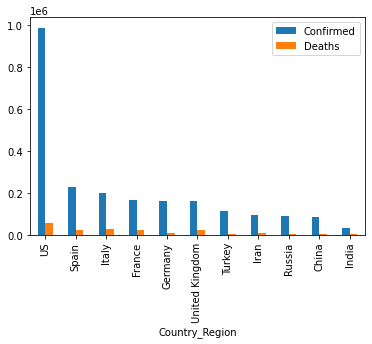

In [51]:
top10.plot(x = 'Country_Region' , y = ['Confirmed','Deaths'] , kind = 'bar')

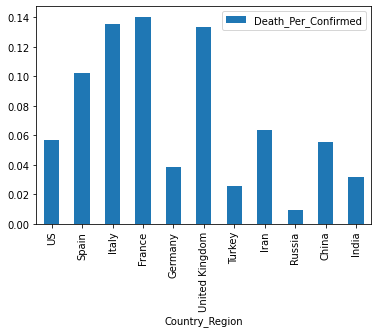

In [52]:
top10.plot(x='Country_Region',y = 'Death_Per_Confirmed',kind = 'bar')

In [0]:
india = country.query('Country_Region == "India"')

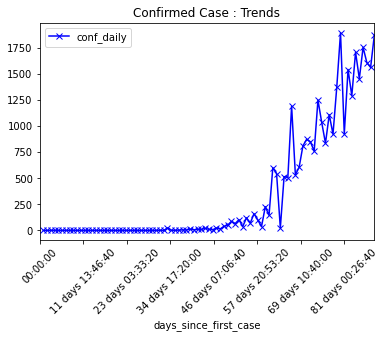

In [76]:
india.plot(x = 'days_since_first_case',y='conf_daily',kind = 'line',color = 'blue',marker = 'x')
plt.xticks(rotation = 45)
plt.title("Confirmed Case : Trends")
plt.show()

In [77]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

### Run ngrok to tunnel Dash app port 8050 to the outside world. 
### This command runs in the background.
get_ipython().system_raw('./ngrok http 8050 &')

### Get the public URL where you can access the Dash app. Copy this URL.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

### Install Dash
!pip install dash==0.31.1  # The core dash backend
!pip install dash-html-components==0.13.2  # HTML components
!pip install dash-core-components==0.39.0  # Supercharged components
!pip install dash-table==3.1.7  # Interactive DataTable component (new!)

--2020-04-29 18:04:30--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.196.154.11, 54.174.137.247, 52.206.56.146, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.196.154.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  34.5MB/s    in 0.4s    

2020-04-29 18:04:31 (34.5 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://c47ceda4.ngrok.io
     |████████████████████████████████| 1.2MB 6.0MB/s 
     |████████████████████████████████| 358kB 26.1MB/s 
  Created wheel for dash: filename=dash-0.31.1-cp36-none-any.whl size=36085 sha256=593b5316ad82aa3679b8de77bad4f8c56334e939ac191476072b9e7de87a656c
  Stored in directory: /root/.cache/pip/wheels/50/0c/6d/3a89

In [78]:
%%writefile my_app1.py
import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

Writing my_app1.py


In [79]:
### Run Dash app
!python my_app1.py

Running on http://127.0.0.1:8050/
Debugger PIN: 457-390-821
 * Serving Flask app "my_app1" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
Running on http://127.0.0.1:8050/
Debugger PIN: 085-716-523
0
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 2464, in __call__
    return self.wsgi_app(environ, start_response)
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 2450, in wsgi_app
    response = self.handle_exception(e)
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1867, in handle_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.6/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.6/dist-packages/flask/app.py", line 1945, in full_dispatch_

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-79-4ae6ca8c43de>", line 1, in <module>
    get_ipython().system('python my_app1.py')
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_shell.py", line 102, in system
    output = _system_commands._system_compat(self, *args, **kwargs)  # pylint:disable=protected-access
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_system_commands.py", line 438, in _system_compat
    shell.var_expand(cmd, depth=2), clear_streamed_output=False)
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_system_commands.py", line 195, in _run_command
    return _monitor_process(parent_pty, epoll, p, cmd, update_stdin_widget)
  File "/usr/lib/python3.6/contextlib.py", line 88, in __exit__
    next(self.gen)
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_

KeyboardInterrupt: ignored

In [32]:
!pip install folium